<a href="https://colab.research.google.com/github/JuliaHdzQ/APRENDIZAJE_AUTOMATICO_23_24/blob/main/pract_Final_LetrasChinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **PR√ÅCTICA FINAL**


> GRUPO A08



>Lucia Valdera Gayoso, Susana Villar Polvorosa, Julia Hern√°ndez Quintas

# √çndice

1. [Introducci√≥n](#introducci√≥n)

2. [Datos](#datos)

   2.1. [Pasos Previos](#pasos-previos)

   2.2. [Importaci√≥n de la base](#importaci√≥n)

   2.3. [An√°lisis y Formato](#an√°lisis-y-formato)

   2.4. [Preprocesamiento de datos](#pre-procesamiento-de-datos)

3. [M√©todos](#m√©todos)

   3.1. [Data Augmentation](#data-augmentation)

   3.2. [Arquitectura del modelo](#arquitectura-del-modelo)

   3.3 [Entrenamiento del modelo](#entrenamiento-del-modelo)

   3.4 [Modelo de Validaci√≥n](#modelo-de-validaci√≥n)

   3.5 [Modelo Final](#modelo-final)

   3.6 [Matriz de confusi√≥n](#matriz-de-confusi√≥n)

4. [Resultados](#m√©todos)

   4.1 [An√°lisis](#an√°lisis)

   4.2 [Predicciones](#predicciones)

   4.3 [Interpretaci√≥n de caracteres a mano](#interpretaci√≥n-de-caracteres-a-mano)


5. [Trabajo a Futuro](#trabajo-a-futuro)

   5.1 [Ideas de implementaciones futuras](#ideas-de-implementaciones-futuras)

   5.2 [Ejemplo: Red de Clasificaci√≥n binaria](#ejemplo-red-de-clasificacion-binaria)

      - 5.2.1 [An√°lisis y formato](#an√°lisis-y-formato)

      - 5.2.2 [Divisi√≥n de datos](#divisi√≥n-de-datos)

      - 5.2.3 [Modelo](#modelo)

      - 5.2.4 [Graficamos el proceso](#graficamos-el-proceso)

      - 5.2.5. [Modelo Final](#modelo-final)



> ## Introducci√≥n  

Hoy en d√≠a gracias al enorme avance digital, contamos con n√∫merosas aplicaciones e interfaces que hacen que nuestro d√≠a a d√≠a sea m√°s sencillo. Este progreso se extiende al reconocimiento de escrituras, lo que supone grandes ventajas en campos como la educaci√≥n y la alfabetizaci√≥n.


Este proyecto se centra en la creaci√≥n y optimizaci√≥n de un modelo de reconocimiento de d√≠gitos manuscritos en el alfabeto √°rabe, utilizando para ello Redes Nueronales Convolucionaes (CNN).

El alfabeto √°rabe esta considerado como uno de los mas elegantes, pero es a su vez uno de los mas complejos, por lo que reconocer sus caracteres escritos a mano no deja de ser un gran desaf√≠o.

El objetivo de este sistema es proporcionar una herramienta eficaz y precisa para identificar y clasificar letras de d√≠gitos manuscritos en √°rabe.

Aunque existen muchos proyecto dedicados al reconcimiento de d√≠gitos a mano, gran parte de ellos se centran en n√∫meros manuscritos, u otros alfabetos. Sin embargo, hemos decidido elegir este alfabeto ya que adem√°s de considerarse una de las manifestaciones m√°s originales del arte isl√°mico, es el alfabeto utilizado en la 6¬∫ lengua m√°s hablada en el mundo.



Cabe mencionar un proyecto de investigaci√≥n [Mar√≠a Nu√±ez M.A, Un mensaje en la botella: escritura √°rabe en contexto, A√±o: 2016, http://hdl.handle.net/10045/61454 ] en el que la identificaci√≥n de las producciones cer√°micas mediavales, pudo llevarse a cabo gracias a la comprensi√≥n de un texto en √°rabe sobre una botella de tipo visig√≥tico.

 As√≠ pues ser√≠a de gran utilidad, identificar dichos car√°cteres con nuestro modelo a pesar de que estos no se vieran correctamente, o pudiesen faltar algunas partes, gracias a la tolerancia a posbiles alteraciones en los datos de entrada, con la que cuenta las redes nueronales.








> ## Datos


El conjunto de datos que hemos utilizado en este proyecto es el "Arabic Handwritten Characters Dataset", obtenido de la reconocida plataforma Kaggle. Este conjunto de datos ofrece una colecci√≥n diversa de caracteres escritos a mano en √°rabe, lo que lo hace relevante para nuestro objetivo de reconocimiento de d√≠gitos manuscritos en el alfabeto √°rabe.

Tama√±o del Conjunto de Datos:
El conjunto de datos contiene [16.800] im√°genes de cracteres manuscritos, proporcionando un tama√±o adecuado para entrenar y evaluar nuestro modelo de reconocimiento.

Fueron escritos por 60 participantes de entre 19 y 40 a√±os, siendo diestros el 90% de ellos. Cada uno de ellos, escribieron 10 veces cada uno de los car√°cteres que conforman este alfabeto, obteniendo as√≠ un total de: 60 * 10 * 28 = 16.800 d√≠gitos manuscritos con los que trabajar.

La elecci√≥n del conjunto de datos se debe a su similitud con el objetivo del proyecto. Epecialmente hemos tenido en cuenta su gran tama√±o, as√≠ como la cercan√≠a de los datos, ya que fueron escritos por participantes voluntarios. Tambien hemos valorado la representatividad de todas las clases (letras del alfabeto), y la ausencia de datos repetidos, que de existir hubieramos tenido que procesar posteriormente.

El m√©todo de recopilaci√≥n y recuperaci√≥n de los datos, ha sido empleando nuestro API de kaggle. As√≠ hemos podido descargar el conjunto de datos requerido desde Kaggle, utilizano el API proporcionado por la plataforma, en nuestro documento.

"Conjunto de datos de caracteres manuscritos √°rabes", 2017: https://www.kaggle.com/datasets/mloey1/ahcd1?select=Arabic+Handwritten+Characters+Dataset+CSV


> ### Pasos previos

En primer lugar llamamos a todas las librer√≠as que ser√°n necesarias para cargar y preparar la base de datos, graficar, crear el modelo de redes neuronales, etc.

In [1]:
# Librer√≠as para la descarga del archivo
import zipfile
from io import BytesIO
from PIL import Image
import pandas as pd
import numpy as np
import io

#Librer√≠as keras
import tensorflow as tf
from tensorflow import keras

#Librer√≠as para el desarrollo de la CNN
import keras
# from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator



#Librer√≠as para graficar
import matplotlib.pyplot as plt
import numpy as np

# Prepraracion de etiquetas
from keras import utils
from keras.utils import to_categorical

# Librer√≠as para importar hiperparametros
from keras.optimizers import SGD

> ### Importaci√≥n

Para ello hemos creado un diccionario con el usario y el API kaggle, que nos permite acceder a cualquier base de datos de esta plataforma. Tambi√©n llevamos a cabo algunos pasos necesarios para la seguridad y permisos de lectura y escritura. Finalmente abrimos la base de datos en modo escritura

In [2]:
api_token = {"username":"juliahernndezquintas","key":"a36e1c000b9dfca556f670ebce90a9f5"}

!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

# Descargamos nuestra base de datos:
!kaggle datasets download -d mloey1/ahcd1

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
 88% 21.0M/24.0M [00:00<00:00, 101MB/s] 
100% 24.0M/24.0M [00:00<00:00, 97.0MB/s]


Una vez hecho esto, debemos abrir el archivo zip en modo lectura, mostrando por pantalla cada elemento que lo forma:

In [3]:
import zipfile

archivo_zip = '/content/ahcd1.zip'

with zipfile.ZipFile(archivo_zip,'r') as zip_file:
  for nombre_archivo in zip_file.namelist():
     print(nombre_archivo)

Se han truncado las √∫ltimas 5000 l√≠neas del flujo de salida.
train images 13440x32x32/train/id_5500_label_16.png
train images 13440x32x32/train/id_5501_label_16.png
train images 13440x32x32/train/id_5502_label_16.png
train images 13440x32x32/train/id_5503_label_16.png
train images 13440x32x32/train/id_5504_label_16.png
train images 13440x32x32/train/id_5505_label_17.png
train images 13440x32x32/train/id_5506_label_17.png
train images 13440x32x32/train/id_5507_label_17.png
train images 13440x32x32/train/id_5508_label_17.png
train images 13440x32x32/train/id_5509_label_17.png
train images 13440x32x32/train/id_550_label_13.png
train images 13440x32x32/train/id_5510_label_17.png
train images 13440x32x32/train/id_5511_label_17.png
train images 13440x32x32/train/id_5512_label_17.png
train images 13440x32x32/train/id_5513_label_18.png
train images 13440x32x32/train/id_5514_label_18.png
train images 13440x32x32/train/id_5515_label_18.png
train images 13440x32x32/train/id_5516_label_18.png
tr

Extraemos los contenidos del archivo zip, y los guardamos ---------------------------------------del s√≠mbolo /.

In [4]:
# Descomprimir el archivo ZIP
archivo_zip = '/content/ahcd1.zip'
extract_to_path = '/content/dataset'

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Cargar los datos de entrenamiento y prueba
csv_train_images_path = '/content/dataset/csvTrainImages 13440x1024.csv'
csv_train_labels_path = '/content/dataset/csvTrainLabel 13440x1.csv'
csv_test_images_path = '/content/dataset/csvTestImages 3360x1024.csv'
csv_test_labels_path = '/content/dataset/csvTestLabel 3360x1.csv'

train_images = pd.read_csv(csv_train_images_path, header=None).to_numpy()
train_labels = pd.read_csv(csv_train_labels_path, header=None).to_numpy() - 1
test_images = pd.read_csv(csv_test_images_path, header=None).to_numpy()
test_labels = pd.read_csv(csv_test_labels_path, header=None).to_numpy() - 1


> ### An√°lisis y formato

**TAMA√ëO**

Hemos cargado nuestros datos divididos en cutro tensores, visualiamos sus tama√±os, y el n√∫mero total de datos:

In [5]:
print("Forma im√°genes =", train_images.shape, "Forma etiquetas =", train_labels.shape)

# Cambiamos el formato de nuestras im√°genes, para convertirlas en matrices de 32 * 32
train_images = train_images.reshape(-1, 32, 32, 1)
test_images = test_images.reshape(-1, 32, 32, 1)


# Comprobamos la nueva forma del tensor que guarda las imagenes:
print("Nueva Forma im√°genes =", train_images.shape, "Nueva Forma etiquetas =", train_labels.shape)


# Tama√±o de los tensores:
print("N√∫mero de im√°genes de entrenamiento =", len(train_images))
print("N√∫mero de im√°genes de test =", len(test_images))
print("N√∫mero de im√°genes totales =", len(train_images) + len(test_images))



Forma im√°genes = (13440, 1024) Forma etiquetas = (13440, 1)
Nueva Forma im√°genes = (13440, 32, 32, 1) Nueva Forma etiquetas = (13440, 1)
N√∫mero de im√°genes de entrenamiento = 13440
N√∫mero de im√°genes de test = 3360
N√∫mero de im√°genes totales = 16800


Para entender un poco mejor nuestra base de datos, estudiaremos en algunos puntos tanto de las im√°genes como de las etiquetas.

Tambi√©n visualizaremos por pantalla algunas de las im√°genes que conforman el conjunto de entrenamiento.


Previamente guardamos los nombres de cada letra del alfabeto √°rabe, que corresponder√°n a las 28 clases en las que se clasifican nuestras im√°genes.

In [6]:
# Crear una lista de clases con los siguientes elementos
clases = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
          'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
          'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

# Mostramos longitud de la lista de clases
print("Longitud de la lista de clases:", len(clases))

# Mostramos el valor m√°ximo en 'train_labels'
print("Valor m√°ximo en train_labels:", max(train_labels))

# Mostramos el segundo elemento de 'train_labels'
print("Segundo elemento de train_labels:", train_labels[1])


Longitud de la lista de clases: 28
Valor m√°ximo en train_labels: [27]
Segundo elemento de train_labels: [0]


In [7]:
# Imprimir la forma del sexto elemento en 'train_images'
print("Forma de la sexta imagen de entrenamiento:", train_images[5].shape)

# Imprimir el primer elemento de 'test_labels'
print("Primera etiqueta de test:", test_labels[0])

# Imprimir la forma de 'test_labels'
print("Forma de test_labels:", test_labels.shape)

# Calcular y imprimir el valor m√°ximo en 'train_images'
max_value = np.max(train_images)
print("Valor m√°ximo en train_images:", max_value)


Forma de la sexta imagen de entrenamiento: (32, 32, 1)
Primera etiqueta de test: [0]
Forma de test_labels: (3360, 1)
Valor m√°ximo en train_images: 255


Representaci√≥n gr√°fica de las 5 primeras im√°genes del conjunto de entrenamiento:

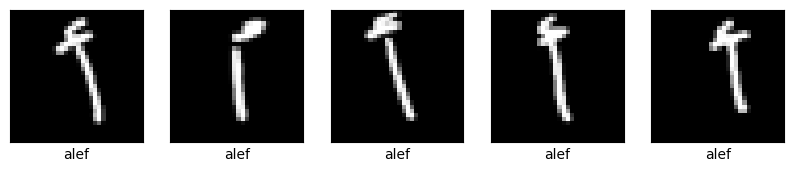

In [8]:
num_images = 5
plt.figure(figsize=(10,10))

# Representamos las im√°genes, con su etiqueta
for i in range(num_images):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape(32,32).T,"gray")
    plt.xlabel(clases[int(train_labels[i][0])])
plt.show()

Verificamos tambien que todas las clases (28 letras del alfabeto) tiene una n√∫mero similar de muestras, y no hay diferencias significativas que pudieran suponer problemas en el entrenamiento y precisi√≥n del modelo:

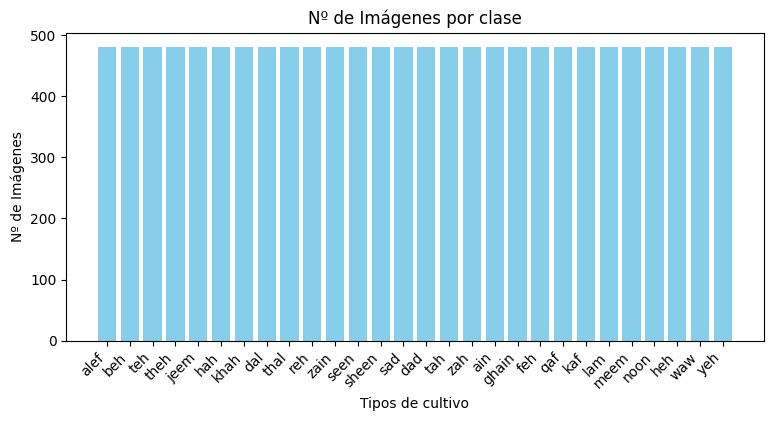

N√∫mero de im√°genes por etiqueta:
[480 480 480 480 480 480 480 480 480 480 480 480 480 480 480 480 480 480
 480 480 480 480 480 480 480 480 480 480]


In [9]:
# Contamos el n√∫mero de etiquetas que hay de cada clase
unique_labels, counts = np.unique(train_labels, return_counts=True)
# unique_labels = np.append(0,unique_labels)

etiquetas = []

for i in range(28):
  etiquetas.append(clases[unique_labels[i]])

# Mostramos el n√∫mero de datos de cada clase, en un gr√°fico de barras
plt.figure(figsize=(9, 4))
plt.bar(etiquetas, counts, color='skyblue')
plt.xlabel('Tipos de cultivo')
plt.ylabel('N¬∫ de Im√°genes')
plt.title('N¬∫ de Im√°genes por clase')
plt.xticks(rotation=45, ha='right')  # Giramos las etiquetas, para poder visualizarlas mejor
plt.show()

# Mostramos el vector que guarda el n√∫mero de im√°genes por cada etiqueta:
print('N√∫mero de im√°genes por etiqueta:')
print(counts)

En este primer vistazo, hemos podido observar que algunas im√°genes estan **agrupadas por clases**, de forma que aparecen varias im√°genes de la misma clase, de forma seguida. Es por ello que utrilizaremos shuffle y las desordenaremos por completo.

Tambi√©n hemos observado que los valores de los p√≠xeles **no est√°n normalizados**, por lo que una buena practica durante el preprocesamiento, ser√° normalizarlos, manteniendo un rango de valores entre [0,1]

> ### Preprocesamiento de los datos

En este punto, llevaremos a cabo algunas modificaciones en los datos, que ayudar√°n y favorecer√°n la convergencia del modelo, as√≠ como una mejor precisi√≥n del mismo.

Pasamos las etiquetas a variables num√©ricas

In [10]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(train_labels) # Transformamos las etiquetas  a n√∫meros
# encoded_labels = label_encoder.fit_transform(test_labels) # Transformamos las etiquetas  a n√∫meros


En primer lugar, normalizamos los valores de los p√≠xeles, dividiendolos simplemente entre 255, y obteniendo valores pertenencientes al rango [0,1]

In [11]:
print(np.max(train_images)) # Verificamos el valor m√°ximo en 255

# Normalizamos los valores de los pixeles.
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

print(np.max(train_images)) # Comprobamos el nuevo valor m√°ximo

255
1.0


**SHUFFLE**

El siguiente paso ser√° mezclar nuestros datos.

Como vimos en el primer an√°lisis, las im√°genes estan ordenadas por clases, por lo que las mezclaremos de forma que todos los datos aparezcan desordenados. A este proceso se le llama shuffle

In [12]:
# Verificamos que el vector de imagenes y etiquetas siguen teniendo la misma longitud
assert len(train_images) == len(train_labels), "Los vectores deben tener la misma longitud"

permutation = np.arange(len(train_images)) # creamos un vector de la misma longitud

np.random.shuffle(permutation) # Lo llenamos de indices aleatorios

# Guardamos las im√°genes y etiquetas con el nuevo orden obtenido
train_images = train_images[permutation]
train_labels = train_labels[permutation]

Volvemos a mostrar por pantalla las 5 primeras im√°genes de entrenamiento, y podremos verificar que ya no pertencen a la misma clase, sino que estan desordenads, y perteneceran a cualquiera de las 28 clases existentes:

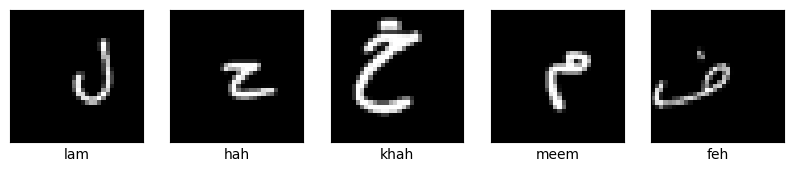

In [13]:
random_indices = np.random.randint(0, train_images.shape[0], size=25)

num_images = 5
plt.figure(figsize=(10,10))

# Representamos las im√°genes, con su etiqueta
for i in range(num_images):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape(32,32).T,"gray")
    plt.xlabel(clases[int(train_labels[i][0])])
plt.show()

Para la preparaci√≥n de nuestros datos, debemos tambi√©n convertir las etiquetas a categ√≥ricas:

In [14]:
# from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[0])
print(train_labels[0].shape)



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0.]
(28,)


Como √∫litmo paso antes de empezar el desarrollo del modelo de redes neuronales convolucionales, dividiremos de nuevo los datos, en entrenamiento y validaci√≥n, lo que nos permitir√° validar nuestro modelo, y elegir los hiperpar√°metros m√°s adecuados:

El siguiente paso ser√° dividir nuestros datos, en :

* Im√°genes de entrenamiento: `tr_images`
* Etiquetas de las imag√©nes de entrenamiento: `tr_labels`
* Im√°genes de test: `valid_images`
* Etiquetas de las im√°genes de test: `valid_labels`

In [15]:
from sklearn.model_selection import train_test_split

tr_images, valid_images, tr_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.125, random_state=42)

# Imprime las longitudes de los conjuntos resultantes
print(len(tr_images))
print(len(valid_images))

11760
1680


> # M√©todos



> ### Data Augmentation

**Data Augmentation** es una t√©cnica clave en el entrenamiento de redes neuronales, utilizada para aumentar artificialmente la variabilidad en los datos de entrenamiento. Mediante transformaciones como rotaciones, cambios de escala (zoom), y desplazamientos, se genera un conjunto de datos m√°s amplio y diverso. Esto es crucial para mejorar la generalizaci√≥n del modelo y prevenir el sobreajuste, especialmente cuando se dispone de un n√∫mero limitado de im√°genes de entrenamiento.

En nuestra implementaci√≥n, aplicamos Data Augmentation para ense√±ar al modelo a reconocer patrones en distintas condiciones. Las transformaciones espec√≠ficas incluyen rotaci√≥n, zoom, desplazamientos y giros. Esta variedad ayuda al modelo a adaptarse mejor a diferentes orientaciones y tama√±os de los objetos en las im√°genes.

**VISUALIZACI√ìN DE DATA AUGMENTATION**

Para ilustrar el efecto del Data Augmentation, mostramos un conjunto de im√°genes originales y sus versiones transformadas. Esta visualizaci√≥n nos permite comprender c√≥mo cada transformaci√≥n altera las im√°genes, preparando al modelo para un espectro m√°s amplio de variaciones en los datos reales.

Es importante se√±alar que las transformaciones mostradas son ejemplos ilustrativos. En el entrenamiento definitivo, hemos empleado par√°metros de Data Augmentation ajustados espec√≠ficamente para nuestro conjunto de datos y objetivos de modelo.

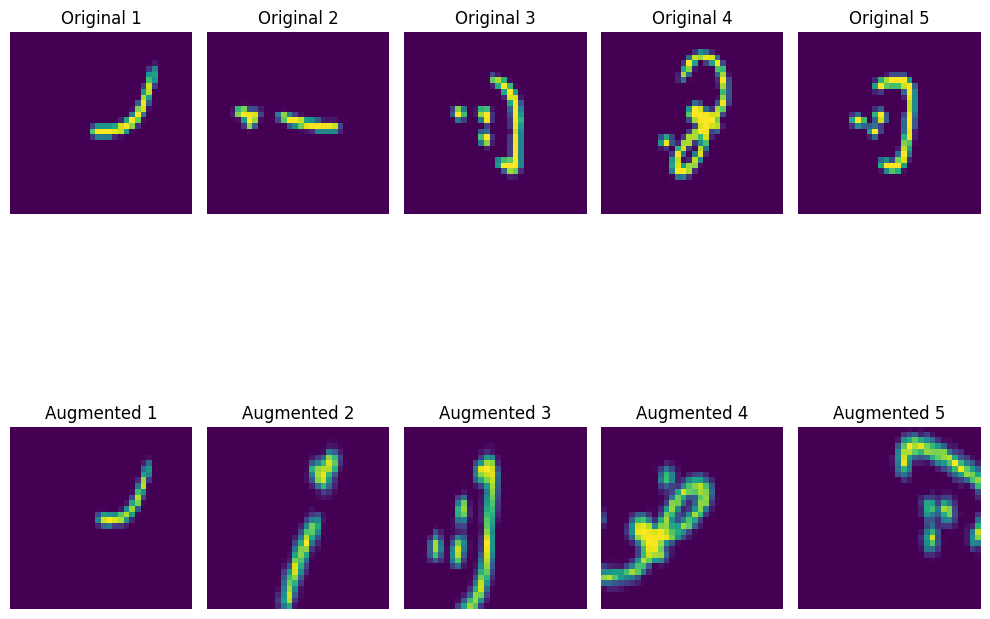

In [16]:

import keras
import numpy as np
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Configuraci√≥n del generador de im√°genes para visualizaci√≥n
datagen_visualization = ImageDataGenerator(
    rotation_range=90,  # Rotaciones de hasta 90 grados
    zoom_range=0.5,     # Permite que las im√°genes se escalen mucho
    width_shift_range=0.3,  # Desplazamientos laterales grandes
    height_shift_range=0.3,  # Desplazamientos verticales grandes
    horizontal_flip=True,    # Permite volteo horizontal
    vertical_flip=True       # Permite volteo vertical
)

num_images_to_show = 5  # N√∫mero de im√°genes a mostrar
indices_to_show = np.random.choice(len(tr_images), num_images_to_show, replace=False)

# Configuraci√≥n del tama√±o de la figura para una mejor visualizaci√≥n
plt.figure(figsize=(10, 2 * num_images_to_show))  # Ajusta el tama√±o seg√∫n sea necesario

# Generaci√≥n y visualizaci√≥n de las im√°genes aumentadas
for i, idx in enumerate(indices_to_show):
    it = datagen_visualization.flow(tr_images[idx:idx+1], batch_size=1)

    # Mostrar imagen original
    plt.subplot(2, num_images_to_show, i + 1)
    plt.imshow(tr_images[idx].squeeze())  # Quita cmap='gray' para mostrar colores
    plt.title(f"Original {i+1}")
    plt.axis('off')

    # Mostrar imagen aumentada
    augmented_image = it.next()[0]
    plt.subplot(2, num_images_to_show, num_images_to_show + i + 1)
    plt.imshow(augmented_image.squeeze())  # Quita cmap='gray' para mostrar colores
    plt.title(f"Augmented {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

> ### Arquitectura del modelo

Hemos escogido esta arquitectura de red neuronal convolucional (CNN) porque es eficaz para el procesamiento de im√°genes. Las capas convolucionales (Conv2D) se utilizan para extraer caracter√≠sticas relevantes de las im√°genes, como bordes y patrones. Hemos elegido 3 capas convolucionales seguidas de capas de agrupaci√≥n (MaxPooling2D) para reducir la dimensionalidad de las caracter√≠sticas extra√≠das y aprender representaciones m√°s abstractas de las im√°genes. La normalizaci√≥n por lotes (BatchNormalization) se utiliza para estabilizar y acelerar el entrenamiento.

Luego, hemos a√±adido capas completamente conectadas (Dense) para realizar la clasificaci√≥n final. Estas capas toman las caracter√≠sticas extra√≠das y las utilizan para predecir las clases de las im√°genes. Tambi√©n hemos incorporado capas de regularizaci√≥n (Dropout) para reducir el sobreajuste y mejorar la generalizaci√≥n del modelo.

El modelo utiliza la funci√≥n de activaci√≥n ReLU en las capas convolucionales para introducir no linealidades en el proceso y la activaci√≥n softmax en la capa de salida para obtener probabilidades de pertenencia a cada una de las 28 clases posibles. La funci√≥n de p√©rdida utilizada es la entrop√≠a cruzada categ√≥rica (categorical_crossentropy) y el optimizador es Adam.



> ### Entrenamiento del modelo




Entrenamos nuestro modelo utilizando el conjunto de datos de entrenamiento. Usamos la t√©cnica de aumento de datos para generar variedad en las im√°genes de entrada y prevenir el sobreajuste. Durante el entrenamiento, ajustamos los pesos y las conexiones del modelo para que se adapte a los datos de entrenamiento. Utilizamos un proceso iterativo para mejorar gradualmente el rendimiento del modelo.
Tambi√©n monitoreamos el rendimiento en el conjunto de validaci√≥n para asegurarnos de que el modelo generalice bien a datos nuevos. Los callbacks, como "EarlyStopping", nos ayudan a gestionar el proceso de entrenamiento y guardar el¬†mejor¬†modelo.

> ### Modelo de Validaci√≥n

Hemos implementado la t√©cnica de "Early Stopping" para detener el entrenamiento si el modelo deja de mejorar en el conjunto de validaci√≥n durante un n√∫mero espec√≠fico de √©pocas consecutivas. Esto evita el sobreajuste y nos asegura que tengamos el mejor modelo posible. Luego, evaluamos el modelo en el conjunto de validaci√≥n para medir su rendimiento final.

In [17]:
# Preparamos el generador de im√°genes para el aumento de datos
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(tr_images)



model = Sequential()
model.add(Conv2D(32,input_shape = (32,32,1), kernel_size = (5, 5), padding="same", activation="relu",))
model.add(Conv2D(32, kernel_size = (5, 5),activation="relu",))
model.add(Conv2D(32, kernel_size = (5, 5),activation="relu",))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64,input_shape = (32,32,1), kernel_size = (5, 5), padding="same", activation="relu",))
model.add(Conv2D(64, kernel_size = (5, 5),activation="relu",))
model.add(Conv2D(64, kernel_size = (5, 5),activation="relu",))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(28, activation = 'softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=8, restore_best_weights=True)


# Entrenamiento del modelo
history = model.fit(
    datagen.flow(tr_images, tr_labels, batch_size=32),
    steps_per_epoch=len(tr_images) // 32,
    epochs=10,
    validation_data=(valid_images, valid_labels),
    callbacks=[ early_stopping],
    verbose=1
)


# Evaluaci√≥n del modelo
test_loss, test_acc = model.evaluate(valid_images, valid_labels)
print("Test accuracy: ", test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        5

Representamos graficamente los resultados obtenidos en t√©rminos de precisi√≥n y p√©rdida a lo largo de las √©pocas seleccionadas. Lo que haremos ser√° colocar en la misma gr√°fica los valores en entrenamiento y en test, de forma que esto nos ayude a evaluar el sobreajuste que se esta produciendo.

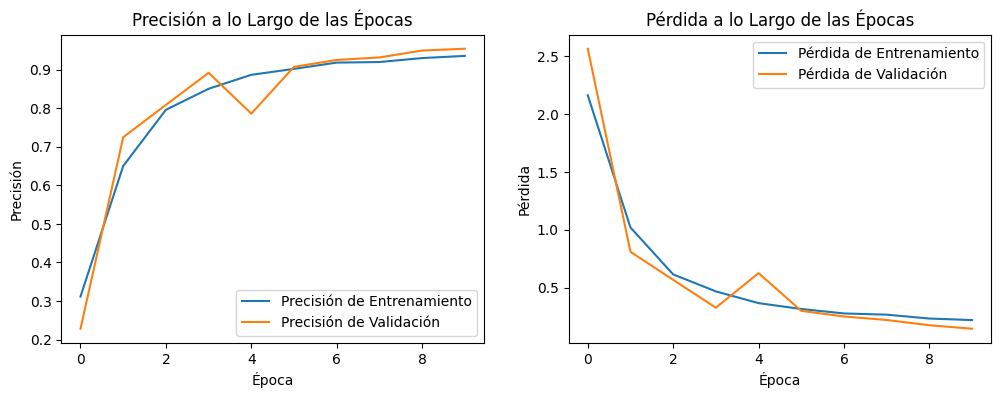

In [18]:
import matplotlib.pyplot as plt

# Precisi√≥n
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisi√≥n de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisi√≥n de Validaci√≥n')
plt.title('Precisi√≥n a lo Largo de las √âpocas')
plt.xlabel('√âpoca')
plt.ylabel('Precisi√≥n')
plt.legend()

# P√©rdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='P√©rdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='P√©rdida de Validaci√≥n')
plt.title('P√©rdida a lo Largo de las √âpocas')
plt.xlabel('√âpoca')
plt.ylabel('P√©rdida')
plt.legend()

plt.show()


**ELECCI√ìN DE √âPOCAS**

Tras analizar las gr√°ficas de precisi√≥n y p√©rdida generadas durante las 10 √©pocas de entrenamiento, se observa un crecimiento en el rendimiento del modelo. La similitud entre las curvas de precisi√≥n de entrenamiento y validaci√≥n sugiere que el modelo no est√° experimentando sobreentrenamiento significativo hasta el momento.

> ## Modelo final

In [19]:
# Preparamos el generador de im√°genes para aumentar los datos de entrenamiento
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(train_images)

model = Sequential()
model.add(Conv2D(32,input_shape = (32,32,1), kernel_size = (5, 5), padding="same", activation="relu",))
model.add(Conv2D(32, kernel_size = (5, 5),activation="relu",))
model.add(Conv2D(32, kernel_size = (5, 5),activation="relu",))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64,input_shape = (32,32,1), kernel_size = (5, 5), padding="same", activation="relu",))
model.add(Conv2D(64, kernel_size = (5, 5),activation="relu",))
model.add(Conv2D(64, kernel_size = (5, 5),activation="relu",))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(28, activation = 'softmax'))

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


# Entrenamiento del modelo
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    steps_per_epoch=len(train_images) // 32,
    epochs=8
)

# Evaluaci√≥n del modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 64)       

In [20]:
# Realizamos las predicciones sobre los datos de test
predicciones = model.predict(test_images)


105/105 [==============================] - 9s 80ms/step


In [21]:
# Obtenemos las etiquetas de clase de las predicciones
predicciones_etiquetas = np.argmax(predicciones, axis=1)

# Comparamos con las etiquetas reales
etiquetas_reales = np.argmax(test_labels, axis=1)
from sklearn.metrics import classification_report

# Mostramos las m√©tricas de clasificaci√≥n
print(classification_report(etiquetas_reales, predicciones_etiquetas))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.98      0.97      0.97       120
           2       0.91      0.97      0.94       120
           3       0.99      0.93      0.96       120
           4       0.99      0.97      0.98       120
           5       0.89      0.99      0.94       120
           6       0.98      0.93      0.96       120
           7       0.95      0.94      0.95       120
           8       0.97      0.88      0.92       120
           9       0.92      0.97      0.95       120
          10       0.92      0.95      0.93       120
          11       0.95      0.98      0.97       120
          12       0.99      0.97      0.98       120
          13       0.93      0.97      0.95       120
          14       0.97      0.93      0.95       120
          15       0.95      0.98      0.97       120
          16       1.00      0.90      0.95       120
          17       0.98    

> ## Matriz de confusi√≥n

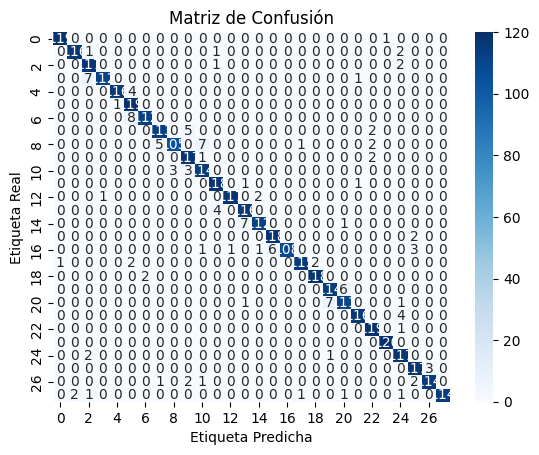

In [22]:


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusi√≥n
matriz_confusion = confusion_matrix(etiquetas_reales, predicciones_etiquetas)

# Dibujar la matriz de confusi√≥n
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusi√≥n')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()


**AN√ÅLISIS DE LA MATRIZ DE CONFUSI√ìN**

 **(cambiar un poco qie lo he copiado de chatty)**

La evaluaci√≥n detallada del modelo revela un rendimiento general destacado, con una precisi√≥n global del 93% en el conjunto de prueba. Este indicador sugiere una capacidad de clasificaci√≥n considerable. Al examinar la matriz de confusi√≥n, se identifican √°reas de fortaleza representadas en la diagonal principal, indicando una buena capacidad de clasificaci√≥n en varias clases espec√≠ficas.

Sin embargo, algunos desaf√≠os notables surgen al analizar ciertas clases. Por ejemplo, las clases 2, 5, 17 presentan puntuaciones de recall m√°s bajas, sugiriendo dificultades en la identificaci√≥n de muestras positivas para estas categor√≠as. Esto podr√≠a deberse a similitudes visuales o caracter√≠sticas compartidas entre estas clases.

El informe de clasificaci√≥n proporciona m√©tricas espec√≠ficas por clase, resaltando √°reas espec√≠ficas de mejora. Se observa que algunas clases tienen puntuaciones de precisi√≥n o recall m√°s bajas, como la clase 2, que presenta una precisi√≥n del 95% pero un recall del 66%. Este desequilibrio indica la necesidad de estrategias espec√≠ficas para mejorar la capacidad del modelo en estas clases problem√°ticas.

El puntaje F1 ponderado, que combina precisi√≥n y recall, ofrece una evaluaci√≥n equilibrada del rendimiento global del modelo. Con un puntaje F1 ponderado del 92%, se confirma que el modelo logra un equilibrio adecuado entre la precisi√≥n y la exhaustividad.

> # Hallazgos





Una vez evaluado el modelo, y realizadas las predicciones con los datos de test, podemos llevar a cabo un an√°lisis de los resultados obtenidos.

En cu√°nto a la precisi√≥n, con este modelo se ha conseguido una precisi√≥n de entorno a un 90 % por ciento en datos que la red no ha visto nunca, por lo que podemos entenderla como una precisi√≥n considerablemente alta.

Adem√°s es importante mencionar que tal y como se busca habitualmente en los algoritmos de machine learning, se ha conseguido alcanzar un equilibrio entre la optimizaci√≥n del modelo, y la generalizaci√≥n, favorenciendo a que el modelo de muy buenos resultados, con datos que no ha visto nunca.

Por √∫ltimo, debemos mencionar que tambi√©n se ha considerado no elevar de forma excesiva el tiempo de ejecuci√≥n del modelo, as√≠ como enocontrar un costo computacional adecuado. Al buscar un equilibrio entre optimizci√≥n y efeciencia, hemos logrado manetener un tiempo de ejecuci√≥n razonable, sin sacrificar demasido la precisi√≥n del modelo.



> ### Predicciones

Para entender mejor estos buenos resultados del modelo, veremos a continuaci√≥n algunas im√°genes junto con sus etiquetas reales, as√≠ como las etiquetas que devuelve el modelo. Adem√°s, veremos tambi√©n el porcentaje con el que el modelo predice que dicha clase es la etiqueta real de la imagen correspondiente:

Mostramos y analizamos las predicciones que hace nuestro modelo para 10 de las im√°genes de test o evaluaci√≥n:


------------------------------------------------------------

--> Imagen 46


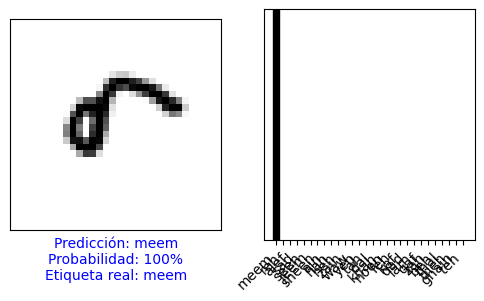







--> Imagen 33


<Figure size 640x480 with 0 Axes>

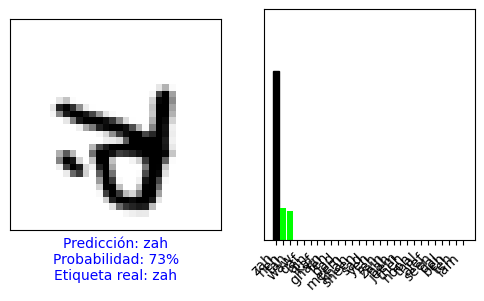







--> Imagen 15


<Figure size 640x480 with 0 Axes>

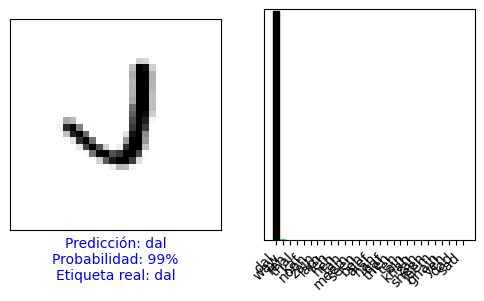







--> Imagen 56


<Figure size 640x480 with 0 Axes>

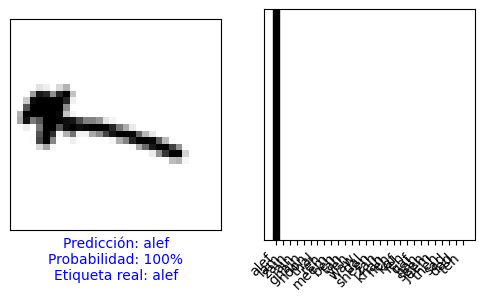







--> Imagen 68


<Figure size 640x480 with 0 Axes>

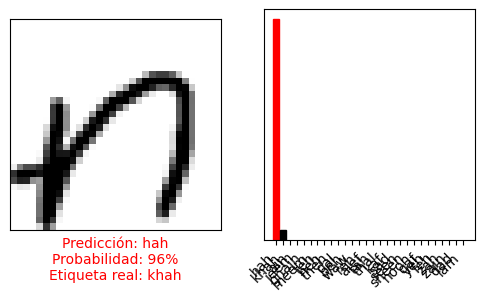







--> Imagen 4


<Figure size 640x480 with 0 Axes>

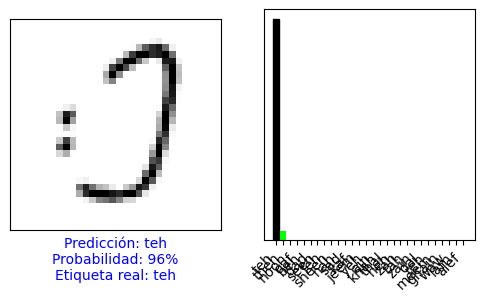







--> Imagen 45


<Figure size 640x480 with 0 Axes>

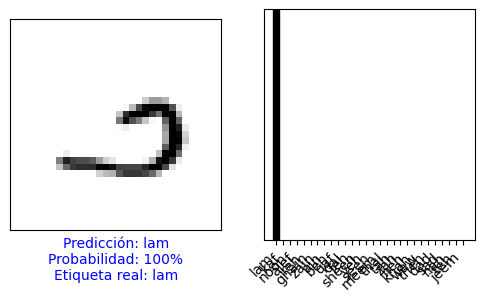







--> Imagen 40


<Figure size 640x480 with 0 Axes>

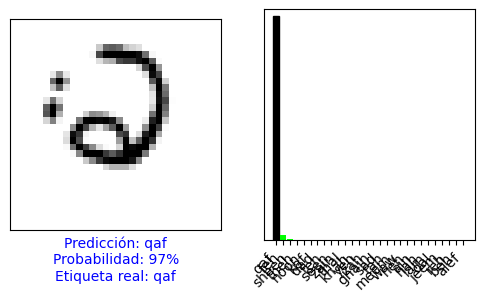







--> Imagen 5


<Figure size 640x480 with 0 Axes>

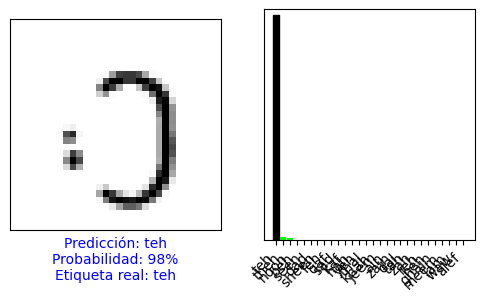







--> Imagen 31


<Figure size 640x480 with 0 Axes>

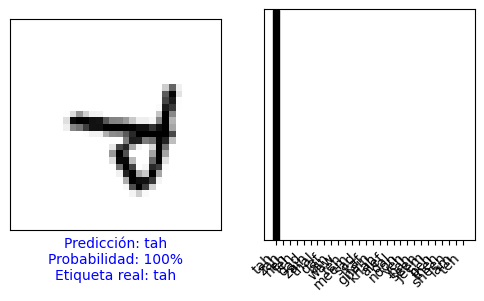

<Figure size 640x480 with 0 Axes>

In [23]:
# FUNCIONES PARA GRAFICAR PREDICCIONES
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Predicci√≥n: {}\nProbabilidad: {:2.0f}%\nEtiqueta real: {}".format(clases[predicted_label],
                                          100 * predictions_array[predicted_label],
                                          clases[true_label]),
                                          color=color)


def plot_value_array(i, predictions_array,true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    top_indices = np.argsort(predictions_array)[-28:][::-1]
    class_labels = [clases[idx] for idx in top_indices]
    plt.xticks(range(28), class_labels, rotation=45, ha='right')  # Ajusta el rango y las etiquetas
# rotation='vertical'
    plt.yticks([])
    thisplot = plt.bar(range(28), predictions_array[top_indices], color="#00FF00")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[0].set_color('red')  # Destacamos la mayor probabilidad
    thisplot[np.argmax(true_label[top_indices])].set_color('black')


random_indices = np.random.choice(100, size=10, replace=False)

print('\n' + '-'*60 + '\n')
for i in (random_indices):

  print (f"--> Imagen {i}")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones[i],  test_labels)
  plt.show()
  plt.clf()
  print('\n''\n')
  print('\n''\n')

**RESULTADOS**

De esta forma, hemos conseguido que nuestro modelo devuelva el nombre de la letra del alfabeto √°rabe correspondiente al d√≠gito manuscrito que deseemos, con una alta probabilida de acierto.

Aunque los resultado son m√°s altos de lo que podr√≠amos esperar al principio del proyecto, consideramos que son adecuados para este problema, ya que los errores que comete son escasos, y la penalizaci√≥n que esto supone en una posible aplicaci√≥n de la vida real, no ser√≠a demasiado grave por regla general (aunque depende de la aplicaci√≥n), por lo que probablemente no ser√≠a conveniente sacrificar el tiempo de ejecuci√≥n o el costo computacional, por una mayor precisi√≥n.


Tratando de analizar la precisi√≥n de nuestros modelos, hemos investigado sobre otros modelo, en los que se ha implementado este mismo problema, y utilizado esta misma base de datos o similares. Hemos recogido sus precisiones, y el n√∫mero de par√°metros totales de sus modelos, con la intenci√≥n de graficar una comparativa entre sus precisiones y n√∫mero de par√°metros:

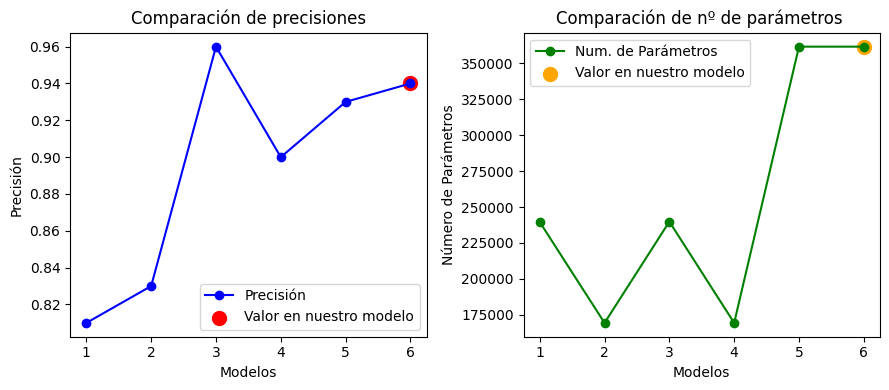

In [24]:
# import matplotlib.pyplot as plt

# Valores recogidos de precisi√≥n y n¬∫ de par√°metros
precisiones = [0.81, 0.83, 0.96, 0.9, 0.93]
num_parametros = [239580, 169308, 239837, 169308, 361692]

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# GRAFICO DE PRECISION
axs[0].plot(range(1, len(precisiones) + 2), precisiones + [0.94], color='blue', marker='o', label='Precisi√≥n')
axs[0].scatter([len(precisiones) + 1], [0.94], color='red', marker='o', label='Valor en nuestro modelo', s=100)
axs[0].set_xlabel('Modelos')
axs[0].set_ylabel('Precisi√≥n')
axs[0].set_title('Comparaci√≥n de precisiones')
axs[0].legend()

# GR√ÅFICO DEL N√öMERO DE PAR√ÅMETROS
axs[1].plot(range(1, len(num_parametros) + 2), num_parametros + [361692], color='green', marker='o', label='Num. de Par√°metros')
axs[1].scatter([len(num_parametros) + 1], [361692], color='orange', marker='o', label='Valor en nuestro modelo', s=100)
axs[1].set_xlabel('Modelos')
axs[1].set_ylabel('N√∫mero de Par√°metros')
axs[1].set_title('Comparaci√≥n de n¬∫ de par√°metros ')
axs[1].legend()

plt.tight_layout()
plt.show()



> ### Interpretaci√≥n de caracteres a mano
Adem√°s, hemos querido poner a prueba el modelo, evaluando como predice la letra del alfabeto griego correspondiente a un d√≠gito manuscritos por nosotras mismas. Para ello, lo hemos escrito y hemos cargado la imagen, obteniendo lo siguiente:

In [25]:
!pip install opencv-python

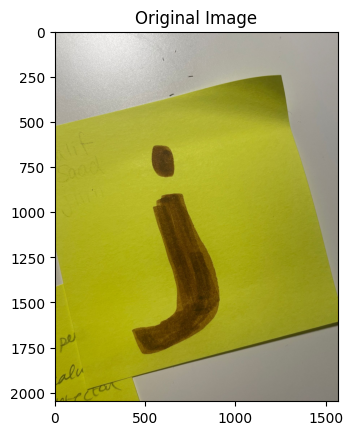

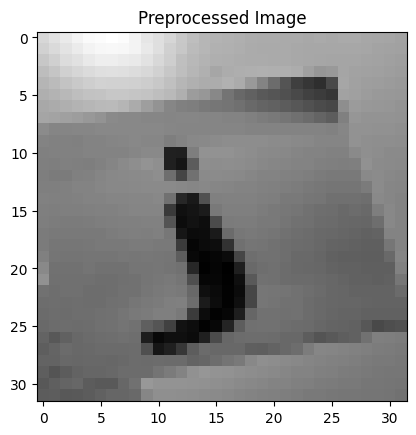

1/1 [==============================] - 0s 170ms/step
Predicci√≥n: dal


In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

ultima_prediccion = None

def preprocess_image(image_path):
    # Descargar la imagen desde la URL
    response = requests.get(image_path)
    img = Image.open(BytesIO(response.content))

    # Convertir la imagen PIL a una matriz NumPy y la mostramos
    image = np.array(img)
    plt.imshow(image)
    plt.title('Original Image')
    plt.show()


    # Convertir a escala de grises si no lo est√°
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Mejora la segmentaci√≥n con umbralizaci√≥n Otsu despu√©s de un ligero desenfoque
    blur = cv2.GaussianBlur(image, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Operaciones morfol√≥gicas para mejorar la estructura del car√°cter
    kernel = np.ones((3, 3), np.uint8)
    morph_image = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Aplicar un umbral adaptativo para binarizar la imagen
    _, binary_image = cv2.threshold(morph_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Encontrar contornos en la imagen binarizada
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Encontrar el contorno m√°s grande (asumiendo que es la letra)
    if contours:
        cnt = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(cnt)

        # Recortar la regi√≥n de inter√©s (ROI) de la imagen original
        roi = image[y:y+h, x:x+w]

        # Redimensionar la ROI a un tama√±o fijo
        desired_size = 32
        roi = cv2.resize(roi, (desired_size, desired_size), interpolation=cv2.INTER_AREA)

        # Normalizar los valores de p√≠xeles al rango [0, 1]
        roi = roi / 255.0

        return roi
    else:
        raise RuntimeError('No se encontraron contornos en la imagen.')

# Carga y preprocesamiento de la imagen
image_path = 'https://drive.google.com/uc?export=download&id=1mh0bSLY0yoxDbM7T_ula1WQV2qD1TNhL'
preprocessed_image = preprocess_image(image_path)

# Normalizaci√≥n y expansi√≥n de la dimensi√≥n
image = preprocessed_image / 255.0
image = np.expand_dims(image, axis=-1)

# Visualizaci√≥n de la imagen preprocesada
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Preprocessed Image')
plt.show()

# Asumiendo que 'model' es tu modelo entrenado
# Predicci√≥n en la imagen preprocesada
prediction = model.predict(np.array([image]))
predicted_class_index = np.argmax(prediction)
predicted_class_name = clases[predicted_class_index]  # Aseg√∫rate de que clases mapea √≠ndices a nombres

# Almacenar la predicci√≥n en la variable
ultima_prediccion = predicted_class_name

print(f'Predicci√≥n: {ultima_prediccion}')


El c√≥digo utiliza la biblioteca OpenCV para la manipulaci√≥n de im√°genes y la extracci√≥n de caracter√≠sticas, junto con la biblioteca NumPy para el manejo eficiente de matrices. El modelo preentrenado (representado por la variable model) se utiliza para realizar predicciones sobre las im√°genes despu√©s de un proceso de preprocesamiento. La funci√≥n preprocess_image realiza operaciones clave, como umbralizaci√≥n, mejora de contornos y recorte, para resaltar la regi√≥n de inter√©s en cada imagen. La normalizaci√≥n y expansi√≥n de dimensiones preparan las im√°genes para la entrada del modelo de aprendizaje profundo. El c√≥digo demuestra la versatilidad al procesar m√∫ltiples im√°genes de manera eficiente en un solo bucle, y las predicciones finales se imprimen para su revisi√≥n. Este enfoque modular y eficiente facilita la adaptaci√≥n a diferentes conjuntos de datos y problemas de reconocimiento de caracteres.


> # Trabajo futuro


> ## Ideas de implementacion futuras

Este es un proyecto que nos pareci√≥ muy interesante llevar a cabo, no solo por las condiciones que ten√≠a, que eran propias para poder ejecutar un modelo de redes neuronales convolucionales, sino tambi√©n por las posibles aplicaciones que entendimos que podr√≠a tener.

Esto, nos hizo verlo no solo como un proyecto acad√©mico, sino como la base de un proyecto con gran utilidad y desarrollo futuro.

Por ello, planteamos algunas ideas de trabajo futuro que podr√≠an aplicarse sobre este proyecto:

1. La primer idea ser√≠a dise√±ar un interfaz, que permita que cualquier persona del mundo pueda convertirse en usuario, capturando im√°genes de d√≠gitos √°rabes manuscritos y recibiendo como respuesta que d√≠gito es. Podr√≠a ser muy √∫til principalmente en entornos educativos.

2. La segunda √≠dea ser√≠a poder utilizarlo como base para completar caracteres incompletos del alfabeto √°rabe. Es decir empleariamos este modelo para identificar a que letra del alfabeto √°rabe corresponde la imagen de un caracter manuscrito incompleto, lo que ser√≠a relativamente sencillo por la capacidad de las redes neuronales para entender entradas incompletas.  Una vez hecho esto podr√≠amos desarrollar un proyecto capaz de generar la parte incompleta, y devolver el caracter completo. Esto ser√≠a muy √∫til en casos como el que mencionamos al incio del proyecto, que trataba de la identificaci√≥n de un texto en √°rabe escrito en una botella hace miles de a√±os, lo que podr√≠a haber provocado la eliminaci√≥n de parte de las letras, con el paso del tiempo.

> ## Ejemplo : Red de Clasificaci√≥n Binaria



**Introducci√≥n a la Nueva Etapa del Proyecto: A√±adiendo An√°lisis de Sentimientos a Tweets en √Årabe**

Despu√©s de crear una red que puede reconocer caracteres √°rabes, decidimos probar algo nuevo: ver qu√© podemos aprender de los tweets en √°rabe. Elegimos los tweets porque son f√°ciles de encontrar y nos dan mucha informaci√≥n sobre lo que la gente piensa y siente.

Nuestro primer proyecto se trataba de entender las letras y palabras √°rabes. Ahora, queremos ir m√°s all√° y entender las emociones detr√°s de esas palabras. La idea es no solo leer lo que dice un tweet, sino tambi√©n entender c√≥mo se siente la persona que lo escribi√≥.

En el futuro, pensamos que podr√≠amos combinar las dos cosas que hemos hecho. Imagina una herramienta que no solo lee escritura √°rabe a mano, sino que tambi√©n te dice si lo que est√° escrito es feliz, triste, enojado, etc. Empezamos con tweets porque son m√°s sencillos, pero m√°s adelante podr√≠amos hacer lo mismo con escritura a mano.

## Aplicaciones a Futuro



1. **Aplicaci√≥n Futura en Educaci√≥n de Idiomas √Årabes**: Una de las aplicaciones m√°s prometedoras de nuestra tecnolog√≠a es en el campo de la educaci√≥n de idiomas. Imaginemos una interfaz interactiva donde estudiantes de todo el mundo puedan escribir frases en √°rabe a mano. Nuestra red neuronal no solo identificar√≠a con precisi√≥n los caracteres √°rabes manuscritos, sino que tambi√©n analizar√≠a el sentimiento de las frases escritas. Esta herramienta ser√≠a √∫til para entender no solo la estructura ling√º√≠stica del √°rabe, sino tambi√©n sus aspectos emocionales y culturales. Ser√≠a una revoluci√≥n en la ense√±anza del √°rabe, ofreciendo una gran experiencia de aprendizaje que combina la escritura, la lectura y la comprensi√≥n emocional.

2. **Aplicaci√≥n Futura en An√°lisis de Redes Sociales en √Årabe**: Otra aplicaci√≥n futura emocionante es en el an√°lisis de sentimiento en redes sociales escritas en √°rabe. Nuestra tecnolog√≠a podr√≠a ser utilizada por empresas, organizaciones o gobiernos para obtener una comprensi√≥n profunda del sentimiento p√∫blico. Al analizar tweets y otros textos en √°rabe, nuestra red podr√≠a identificar tendencias de opini√≥n, reacciones a eventos o productos, y el estado de √°nimo general de una comunidad. Esto ser√≠a especialmente √∫til en situaciones de r√°pida evoluci√≥n, como durante lanzamientos de productos, eventos pol√≠ticos o crisis sociales, donde comprender las reacciones y emociones del p√∫blico en tiempo real es crucial.


**Importaci√≥n de datos**


 Preparamos nuestro entorno para descargar la base de datos desde Kaggle. Creamos un token de API para la autenticaci√≥n, lo que nos permite acceder a los datos de manera segura. Luego, descargamos la base de datos espec√≠fica que necesitamos para nuestro trabajo. Esto asegura que tengamos acceso a los datos que requerimos para nuestro proyecto.

In [27]:
import gc
gc.collect()

145986

In [28]:
api_token = {"username":"juliahernndezquintas","key":"a36e1c000b9dfca556f670ebce90a9f5"}

!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

# Descargamos nuestra base de datos:
!kaggle datasets download -d mksaad/arabic-sentiment-twitter-corpus

mkdir: cannot create directory ‚Äò/root/.kaggle‚Äô: File exists
  0% 0.00/16.9M [00:00<?, ?B/s]
100% 16.9M/16.9M [00:00<00:00, 177MB/s]


In [29]:
import zipfile

archivo_zip = '/content/arabic-sentiment-twitter-corpus.zip'





In [30]:
import zipfile

archivo_zip = '/content/arabic-sentiment-twitter-corpus.zip'

# Funci√≥n para procesar los archivos de texto
def procesar_archivos_texto(archivo_zip):
    text_data = []
    text_labels = []

    with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
        file_list = zip_ref.namelist()

        for file_info in file_list:
            if file_info.lower().endswith('.txt'):
                try:
                    # Asumimos que la etiqueta est√° en la segunda posici√≥n del nombre del archivo
                    label = file_info.split('/')[1]
                    with zip_ref.open(file_info) as file:
                        text = file.read().decode('utf-8')

                        text_data.append(text)
                        text_labels.append(label)
                except IndexError:
                    print(f"Error en la estructura del archivo: {file_info}")

    return text_data, text_labels

# Procesamos los archivos de texto
tweets, etiquetas = procesar_archivos_texto(archivo_zip)

# Verificamos el n√∫mero de tweets procesados
print(f"Total de tweets procesados: {len(tweets)}")


Total de tweets procesados: 58751


> ### An√†lisis y formato

 Realizamos un muestreo aleatorio de nuestro conjunto de datos original, seleccionando 20,000 tweets de manera aleatoria sin reemplazo. Esto se hace utilizando la biblioteca NumPy para generar √≠ndices aleatorios y luego seleccionar los tweets correspondientes a esos √≠ndices. El objetivo es reducir el tama√±o de nuestro conjunto de datos para facilitar su manejo y procesamiento en etapas posteriores de nuestro proyecto.

In [31]:
# Importamos la biblioteca NumPy
import numpy as np

# Definimos el tama√±o de la muestra deseada (10,000 en este caso)
sample_size = 20000

# Realizamos un muestreo aleatorio de tus datos originales
random_indices = np.random.choice(len(tweets), sample_size, replace=False)
tweets = [tweets[i] for i in random_indices]
etiquetas = [etiquetas[i] for i in random_indices]

# Verificamos el n√∫mero de tweets en la muestra
print(f"Total de tweets en la muestra: {len(tweets)}")


Total de tweets en la muestra: 20000


In [32]:

print(etiquetas[:10])


['neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos']


In [33]:

unique_labels = set(etiquetas)
print(f"N√∫mero de etiquetas √∫nicas: {len(unique_labels)}")
print(unique_labels)


N√∫mero de etiquetas √∫nicas: 2
{'pos', 'neg'}


In [34]:
print(tweets[0])
print(etiquetas[0])

Ÿ≤ŸÑŸäÿ≥ ŸÖŸÜ ÿßŸÑÿπŸäÿ® ÿßŸÜ ÿ™ÿ≠ŸÅÿ∏ ŸÉŸÑ ÿßŸÑÿ£ÿ∫ÿßŸÜŸä .. Ÿàÿ™ŸÉÿ±ÿ± ŸÜŸÅÿ≥ ÿßŸÑÿ≥Ÿàÿ±ÿ© ŸÅŸä ŸÉŸÑ ÿµŸÑÿßÿ© .. üíî

neg


Creamos un diccionario que nos permite traducir palabras en n√∫meros. Esto es fundamental para que las computadoras puedan entender y procesar el texto, ya que trabajan principalmente con n√∫meros. Primero, contamos cu√°ntas veces aparece cada palabra en nuestros mensajes de texto para identificar las palabras m√°s comunes. Luego, creamos un diccionario que asigna un n√∫mero √∫nico a cada palabra, lo que facilita la traducci√≥n de palabras en n√∫meros. Tambi√©n creamos una inversa de este diccionario para convertir n√∫meros en palabras cuando sea necesario. Este proceso es crucial para la representaci√≥n de texto en modelos de aprendizaje autom√°tico y procesamiento de lenguaje natural. Cada palabra en el tweet se reemplaza por su correspondiente n√∫mero seg√∫n el diccionario. Si una palabra no est√° en el diccionario, le asignamos el valor 0 para indicar que es desconocida. Esto nos permite representar el texto de manera num√©rica, que es el formato que los modelos de aprendizaje autom√°tico pueden procesar.

In [35]:
from collections import Counter

# Paso 1: Creamos un diccionario de mapeo de palabras a √≠ndices
def crear_word_index(tweets):
    # Contamos la frecuencia de cada palabra en los tweets
    todas_las_palabras = ' '.join(tweets).split()
    frecuencias = Counter(todas_las_palabras)
    palabras_mas_comunes = [palabra for palabra, _ in frecuencias.most_common()]

    # Creamos el diccionario de mapeo
    word_index = {palabra: i+1 for i, palabra in enumerate(palabras_mas_comunes)}  # empezamos en 1
    return word_index

word_index = crear_word_index(tweets)
# Imprimimos el word_index en columnas
column_width = max(len(word) for word in word_index.keys()) + 1
for palabra, indice in word_index.items():
    print(f"{palabra:{column_width}}: {indice}")
# Paso 2: Convertimos cada tweet a una secuencia de √≠ndices
tweets_como_indices = []
for tweet in tweets:
    indices = [word_index.get(palabra, 0) for palabra in tweet.split()]  # 0 para palabras desconocidas
    tweets_como_indices.append(indices)



Se han truncado las √∫ltimas 5000 l√≠neas del flujo de salida.
ÿ™ŸàÿØŸàŸÜ                                    : 45781
ÿ±ÿ§Ÿäÿ™Ÿä                                    : 45782
ŸÅÿßŸÜŸä                                     : 45783
ÿ±ŸàŸäÿ™ŸÉŸÖ                                   : 45784
..‚ù•                                      : 45785
ÿ≥ŸäÿØŸä‚Ä¶                                    : 45786
ÿ¥ŸÅÿ™ÿß                                     : 45787
ŸàŸÑŸÖÿ≠ÿ™                                    : 45788
ÿßŸÑŸÉÿ∞ÿ®ÿ©..ŸÇŸÑÿ®Ÿä                             : 45789
ÿ≠ŸÜŸÑÿß                                     : 45790
ŸÅÿ±ŸÇŸÜŸä                                    : 45791
ÿ®ŸàŸÇÿ™ÿß                                    : 45792
ÿ∫ŸÜŸäÿ™ŸÑÿß                                   : 45793
ŸÇŸÑÿ™ŸÑÿß                                    : 45794
ÿ≠ÿ®Ÿäÿ®ÿ™Ÿä‚ô´‚Ä¶                                 : 45795
ŸÖÿ¥ÿ¥ÿ±ŸÇ                                    : 45796
ÿ¥ÿπÿ±ŸäŸá                                    : 45797
Ÿäÿ§ŸÑŸÖŸÜŸä

Invertimos el diccionario de mapeo, lo que nos permite traducir n√∫meros en palabras. Luego, decodificamos una secuencia de n√∫meros en texto. Por ejemplo, podemos convertir una secuencia de √≠ndices en el primer tweet de nuevo a palabras y mostrarlo en texto legible.

In [36]:
# Paso 3: Invertimos el diccionario de mapeo
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Paso 4: Decodificamos una secuencia de √≠ndices (ejemplo con el primer tweet)
decoded_tweet = ' '.join([reverse_word_index.get(i, '?') for i in tweets_como_indices[0]])

print(decoded_tweet)

Ÿ≤ŸÑŸäÿ≥ ŸÖŸÜ ÿßŸÑÿπŸäÿ® ÿßŸÜ ÿ™ÿ≠ŸÅÿ∏ ŸÉŸÑ ÿßŸÑÿ£ÿ∫ÿßŸÜŸä .. Ÿàÿ™ŸÉÿ±ÿ± ŸÜŸÅÿ≥ ÿßŸÑÿ≥Ÿàÿ±ÿ© ŸÅŸä ŸÉŸÑ ÿµŸÑÿßÿ© .. üíî


Realizamos la conversi√≥n de las secuencias de texto y etiquetas en representaciones num√©ricas comprensibles para las computadoras. Para lograrlo, primero creamos una funci√≥n que transforma las secuencias de palabras en vectores binarios. Luego, identificamos el valor m√°ximo de √≠ndice en el diccionario de palabras, lo que nos permitie crear vectores binarios para las secuencias de texto. Tambi√©n llevamos a cabo la conversi√≥n de etiquetas de texto a valores num√©ricos. Este proceso es fundamental para que los modelos de aprendizaje autom√°tico y procesamiento de lenguaje natural puedan trabajar eficazmente con datos de texto.

In [37]:
import numpy as np

# Funci√≥n para vectorizar secuencias
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Pasa √≠ndices espec√≠ficos de results[i] a 1s
    return results

# Suponemos que el n√∫mero m√°ximo de palabras es el tama√±o del diccionario
max_word_index = max(word_index.values())
x_tweets = vectorize_sequences(tweets_como_indices, dimension=max_word_index + 1)

# Vectorizamos las etiquetas
etiqueta_a_indice = {'pos': 1, 'neg': 0}  # Actualizamos seg√∫n tus etiquetas
etiquetas_numericas = [etiqueta_a_indice[etiqueta] for etiqueta in etiquetas]
x_etiquetas = np.array(etiquetas_numericas)



> ### Divisi√≥n de datos

Dividimos los datos en test, train y validaci√≥n

In [38]:
total_samples = len(x_tweets)
num_val_samples = int(total_samples * 0.10)  # 10% para validaci√≥n
num_test_samples = int(total_samples * 0.20)  # 20% para prueba

x_val = x_tweets[:num_val_samples]
partial_x_train = x_tweets[num_val_samples:(total_samples - num_test_samples)]
x_test = x_tweets[(total_samples - num_test_samples):]

y_val = x_etiquetas[:num_val_samples]
partial_y_train = x_etiquetas[num_val_samples:(total_samples - num_test_samples)]
y_test = x_etiquetas[(total_samples - num_test_samples):]


> ### Modelo

En la construcci√≥n del modelo de redes neuronales, hemos optado por una arquitectura secuencial en la que se definen capas una detr√°s de otra. La primera capa oculta contiene 8 unidades neuronales.La funci√≥n de activaci√≥n utilizada en esta capa es ReLU (Rectified Linear Unit), que es com√∫nmente utilizada para introducir no linealidad en el modelo.

La capa de salida consta de una √∫nica unidad con una funci√≥n de activaci√≥n sigmoide. Esta configuraci√≥n es adecuada para problemas de clasificaci√≥n binaria, como el nuestro, donde queremos predecir si un tweet es positivo o negativo.

En cuanto a los hiperpar√°metros de entrenamiento, hemos seleccionado el optimizador RMSprop con una tasa de aprendizaje de 0.001. Este optimizador se utiliza com√∫nmente en tareas de clasificaci√≥n y regresi√≥n. La funci√≥n de p√©rdida elegida es la "binary_crossentropy", adecuada para problemas de clasificaci√≥n binaria. Adem√°s, estamos monitoreando la m√©trica de "accuracy" (precisi√≥n) para evaluar el rendimiento del modelo durante el entrenamiento.

In [39]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt


# Asumimos que x_tweets tiene la forma (n√∫mero de muestras, dimensiones de caracter√≠sticas)
input_dimension = x_tweets.shape[1]

# Creamos el modelo
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(input_dimension,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])



Configuramos el modelo, especificando c√≥mo debe aprender. Usamos el optimizador RMSprop y la funci√≥n de p√©rdida "binary_crossentropy" porque estamos resolviendo un problema de clasificaci√≥n binaria. Adem√°s, evaluaremos su precisi√≥n ("acc").

Despu√©s, entrenamos el modelo durante 10 rondas, actualiz√°ndolo con grupos de 128 ejemplos a la vez. Durante el entrenamiento, seguimos c√≥mo le va al modelo en t√©rminos de p√©rdida y precisi√≥n en un registro "history_dict". Esto nos ayuda a entender qu√© tan bien aprende el modelo y si generaliza bien.

In [40]:


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

history_dict = history.history


Epoch 1/10
110/110 [==============================] - 20s 157ms/step - loss: 0.5972 - acc: 0.8551 - val_loss: 0.5082 - val_acc: 0.9140
Epoch 2/10
110/110 [==============================] - 11s 96ms/step - loss: 0.4149 - acc: 0.9344 - val_loss: 0.3715 - val_acc: 0.9285
Epoch 3/10
110/110 [==============================] - 5s 47ms/step - loss: 0.2828 - acc: 0.9556 - val_loss: 0.2756 - val_acc: 0.9420
Epoch 4/10
110/110 [==============================] - 6s 56ms/step - loss: 0.1955 - acc: 0.9651 - val_loss: 0.2152 - val_acc: 0.9450
Epoch 5/10
110/110 [==============================] - 5s 46ms/step - loss: 0.1412 - acc: 0.9708 - val_loss: 0.1787 - val_acc: 0.9480
Epoch 6/10
110/110 [==============================] - 5s 44ms/step - loss: 0.1079 - acc: 0.9756 - val_loss: 0.1584 - val_acc: 0.9470
Epoch 7/10
110/110 [==============================] - 6s 59ms/step - loss: 0.0866 - acc: 0.9781 - val_loss: 0.1468 - val_acc: 0.9475
Epoch 8/10
110/110 [==============================] - 5s 44ms/step

> ### Graficamos el proceso

Las gr√°ficas nos permiten interpretar c√≥mo evoluciona nuestro modelo durante el entrenamiento. En la gr√°fica de p√©rdida, observamos si disminuye tanto en el entrenamiento como en la validaci√≥n, lo que es deseable. En la gr√°fica de precisi√≥n, buscamos que aumente en ambas curvas, indicando una mejora en el rendimiento del modelo. Sin embargo, si la p√©rdida de validaci√≥n comienza a subir o la precisi√≥n disminuye, podr√≠a ser un signo de sobreajuste del modelo, algo que debemos vigilar.

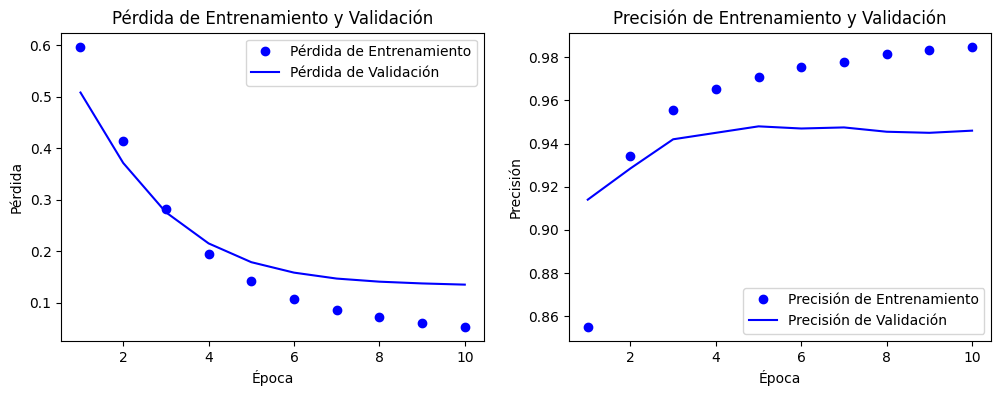

In [41]:
import matplotlib.pyplot as plt

# Extraemos los datos del historial de entrenamiento y validaci√≥n
loss = history_dict['loss']
acc = history_dict['acc']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss) + 1)

# Graficamos de la p√©rdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='P√©rdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='P√©rdida de Validaci√≥n')
plt.title('P√©rdida de Entrenamiento y Validaci√≥n')
plt.xlabel('√âpoca')
plt.ylabel('P√©rdida')
plt.legend()

# Graficamos de la precisi√≥n
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Precisi√≥n de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisi√≥n de Validaci√≥n')
plt.title('Precisi√≥n de Entrenamiento y Validaci√≥n')
plt.xlabel('√âpoca')
plt.ylabel('Precisi√≥n')
plt.legend()

plt.show()


> ### Modelo final

In [42]:
from keras import models
from keras import layers

# Nos aseguramos de que el tama√±o de entrada coincida con tus datos vectorizados
input_dimension = x_tweets.shape[1]  # Cambiamos seg√∫n tus datos

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(input_dimension,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo con tus datos
model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=128)

# Evaluaci√≥n con el conjunto de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print("P√©rdida con los datos de test:", test_loss)
print("Precisi√≥n con los datos de test:", test_acc)

# Realizamos predicciones con el conjunto de test
predictions = model.predict(x_val)


Epoch 1/4
110/110 [==============================] - 9s 77ms/step - loss: 0.5464 - accuracy: 0.7850
Epoch 2/4
110/110 [==============================] - 10s 93ms/step - loss: 0.2670 - accuracy: 0.9521
Epoch 3/4
110/110 [==============================] - 9s 81ms/step - loss: 0.1140 - accuracy: 0.9761
Epoch 4/4
125/125 [==============================] - 1s 5ms/step - loss: 0.1628 - accuracy: 0.9385
P√©rdida con los datos de test: 0.16281238198280334
Precisi√≥n con los datos de test: 0.9384999871253967
63/63 [==============================] - 0s 6ms/step
